# PHYS 309 T1 Measurements. Nov. 1, 2017

November 1, 2017

In [1]:
%pylab inline
import seaborn
seaborn.set_style('whitegrid')
seaborn.set_context('paper', font_scale=1.4)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def make_plt(t, data):
    scatter(t, data)
    xlabel('Time (ms)')
    ylabel('Signal strength')

### Polarization times from 1s to 5s in steps of 200ms
Second data set of the day (accidently deleted first data set)

In [3]:
peaks1 = [4.24, 4.75, 5.66, 6.23, 6.02, 6.31, 7.78, 7.77, 7.91, 8.91, 9.51,
         8.83, 10.38, 10.31, 10.74, 10.52, 11.64, 11.58, 10.77, 11.46]
polarization_t1 = arange(1000, 5000, 200)

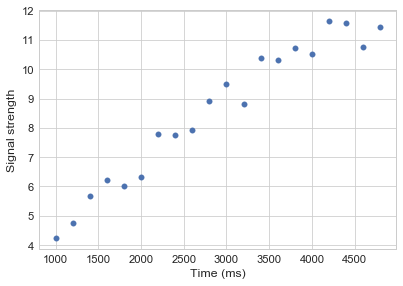

In [4]:
make_plt(polarization_t1, peaks1)

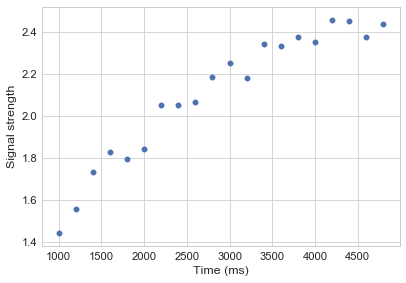

In [5]:
make_plt(polarization_t1, log(peaks1))

### Polarization time from 0 to 7500ms in increasing time steps

In [6]:
peaks2 = array([1.56, 2.45, 2.19, 2.95, 2.32, 2.86, 3.34, 3.06, 4.1, 4.81, 5.36, 
         4.13, 5.87, 4.98, 5.41, 5.97, 7.99, 8.66, 8.93, 8.94, 7.92, 10.41, 9.72, 10.0, 8.01, 7.75])
t2 = concatenate([arange(400, 1000, 100), arange(1000, 3000, 200), arange(3000, 7501, 500)])
t2

array([ 400,  500,  600,  700,  800,  900, 1000, 1200, 1400, 1600, 1800,
       2000, 2200, 2400, 2600, 2800, 3000, 3500, 4000, 4500, 5000, 5500,
       6000, 6500, 7000, 7500])

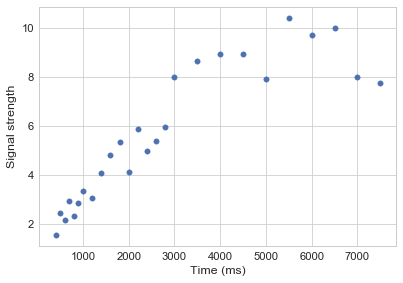

In [7]:
make_plt(t2, peaks2)

Not sure why there are "doubled points".

In [26]:
def exp_model(t, T1, M0, d):
    return M0 * (1-exp(-t/T1)) + d

In [9]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(exp_model, t2, peaks2, p0=[3000, 10])

In [10]:
popt

array([ 2548.09893348,     9.98538839])

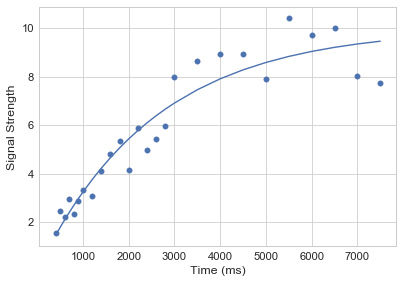

In [11]:
scatter(t2, peaks2)
plot(t2, exp_model(t2, popt[0], popt[1]))
xlabel('Time (ms)')
ylabel('Signal Strength')

Our preliminary measurement of $T_1$ is 2.5s 

### NEW PLAN

 * Measure the area under the spectrum vs frequency plot for polarization times from 0.5s to 10s in increasing time steps. Total of 30 points: 
 
 t (in ms) = [500, 600, 700, 800, 900, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 9000, 10000]
 
* Repeat measurements at the same polarization times to get uncertainties

In [12]:
t = array([500, 600, 700, 800, 900, 1000, 1200, 1400, 1600, 1800, 2000,
     2200, 2400, 2600, 2800, 3000, 3200, 3400, 3800, 4000, 
     4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 9000, 10000])

In [13]:
areas1 = array([73.57, 83.0, 99.79, 107.62, 122.67, 131.91, 156.0, 208.57, 
                200.81, 212.75, 219.21, 251.79, 267.42, 289.31, 299.68, 304.39, 
                316.9, 332.14, 347.87, 352.1, 358.19, 390.04, 401.8, 391.21,
                400.35, 411.27, 418.92, 421.03, 418.33, 432.67]) 
peaks1 = array([2.06, 2.91, 3.04, 3.23, 3.58, 3.9, 4.91, 5.7, 5.76, 6.1, 
                6.5, 7.13, 7.62, 7.87, 8.83, 8.37, 8.95, 8.86, 9.84, 9.85,
                10.39, 10.35, 9.72, 11.23, 10.74, 11.96, 11.6, 11.53, 12.1, 12.65])

In [14]:
areas2 = array([57.66, 62.73, 75.63, 78.19, 95.0, 105.69, 142.23, 157.97, 171.83, 200.9, 201.6,
               197.13, 252.13, 265.95, 270.36, 284.46, 295.93, 300.7, 332.24, 327.07, 349.01, 272.49,
               367.0, 376.16, 395.43, 391.2, 400.04, 395.91, 390.86, 397.96])
peaks2 = array([2.19, 2.39, 2.71, 3.16, 3.32, 3.39, 3.81, 4.22, 4.36, 4.79, 5.0,
               4.23, 6.04, 7.87, 8.28, 8.69, 9.36, 9.35, 9.82, 10.63, 10.36, 7.44, 10.81,
               11.06, 11.77, 11.58, 12.46, 11.83, 12.15, 12.08])

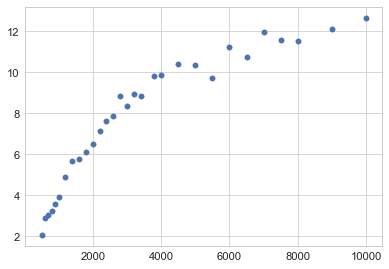

In [15]:
scatter(t, peaks1)

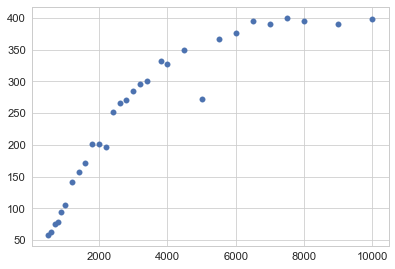

In [16]:
scatter(t, areas2)

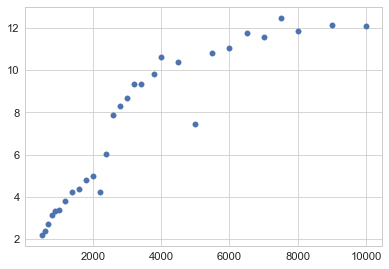

In [17]:
scatter(t, peaks2)

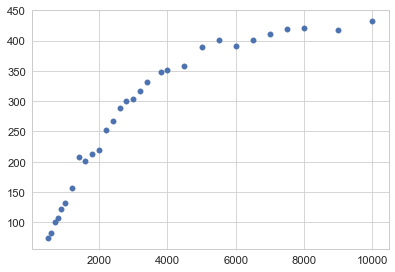

In [18]:
scatter(t, areas1)

array([ 2598.84785973,   442.85147519])

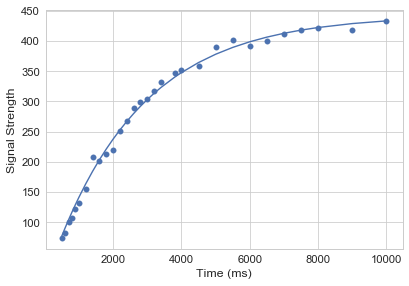

In [19]:
popt1a, pcov1a = curve_fit(exp_model, t, areas1, p0=[3000, 10])

scatter(t, areas1)
plot(t, exp_model(t, popt1a[0], popt1a[1]))
xlabel('Time (ms)')
ylabel('Signal Strength')
popt1a

### Final data analysis of today: average over last 2 data sets

In [33]:
from scipy.stats import sem
areas12_avg = mean(vstack((areas1, areas2)), axis=0)
areas12_std = sem(vstack((areas1, areas2)), axis=0)

<Container object of 3 artists>

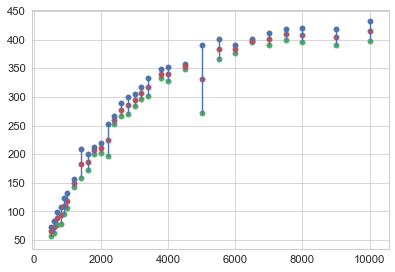

In [34]:
scatter(t, areas1)
scatter(t, areas2)
scatter(t, areas12_avg)
errorbar(t, areas12_avg, yerr=areas12_std, linestyle="None")

#### Model fit of averaged data

(2510.8145814335471, array([ 71.17054466,   4.09664841,   5.24882511]))

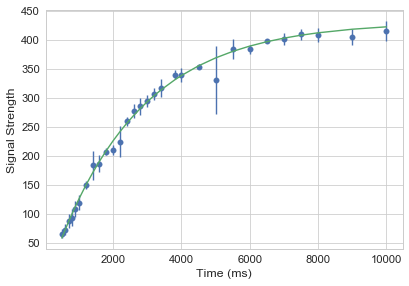

In [35]:
avg_popt, avg_pcov = curve_fit(exp_model, t, areas12_avg, sigma=areas12_std, p0=[3000, 400, 0])

scatter(t, areas12_avg)
errorbar(t, areas12_avg, yerr=areas12_std, linestyle="None")
plot(t, exp_model(t, avg_popt[0], avg_popt[1], avg_popt[2]))
xlabel('Time (ms)')
ylabel('Signal Strength')
perr = np.sqrt(np.diag(avg_pcov))
avg_popt[0], perr

From our model fit, we have $T_1 = 2.5 \pm 0.071 s$ 

#### Residuals

(-40, 40)

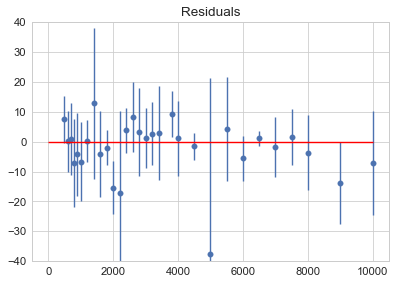

In [36]:
residuals = areas12_avg - exp_model(t, avg_popt[0], avg_popt[1], avg_popt[2])
scatter(t, residuals)
errorbar(t, residuals, yerr=areas12_std, linestyle="None")
hlines(0, 0, 10000, colors='r')
title('Residuals')
ylim([-40,40])

Residuals look okay, with a roughly equal number of points on either side of the x axis, and most but not all error bars crossing the x axis. However, there might be a pattern in the residuals and the error bars are probably not correct since we only took two sets of data. In fact it looks like we might have overestimated the error as it looks like too many points are crossing the x axis.  

#### Reduced $\chi^2$

In [39]:
expected = exp_model(t, avg_popt[0], avg_popt[1], avg_popt[2])
1/(size(t)-3) * np.sum((areas12_avg - expected)**2 / areas12_std**2)

0.38299287479444372

The reduced $\chi^2$ of our model is 0.38, indicating an okay fit or an overestimate of our error. We suspect that our error bars are not very accurate since we are only averaging over two runs and using the standard deviation over two runs as the error estimate (this of course just reduces to using the difference between our two runs for our error).

### Conclusions for Nov. 1

After much experimenting, we have found a method that seems to work for measuring $T_1$. We want to measure the area under the peak of the Fourier transform. Our final value of $T_1 = 2.5 \pm 0.071 s$ matches our expecations for the $T_1$ of water. Our model doesn't seem to fit that well right now, but we will collect much more data next time and that should hopefully fix it. We may also need to rethink the error in $T_1$ simply taking the value from the covariance matrix may not be correct.

In addition, although the measurements we made did appear to give us an exponential decay and we may be able to obtain measurments of $T_1$ with this procedure, it might be better to use a different procedure where we analyse the data with Python ourselves instead of relying on the rather crude method where we have to select the peak limits manually available on the program provided on the lab computers. In particular, we were told that the Fourier transform taken by the lab computer program may not account for both the real and complex of the transform and therefore may not give us the complete information present in the signal. We will verify this claim next week.